In [53]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [54]:
df_paths=glob.glob(r"C:\Users\NTCUONG\notebook\training_LR\*.csv")
df_paths

['C:\\Users\\NTCUONG\\notebook\\training_LR\\training1.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training10.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training11.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training12.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training2.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training3.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training4.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training5.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training6.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training7.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training8.csv',
 'C:\\Users\\NTCUONG\\notebook\\training_LR\\training9.csv']

In [56]:
statistic_tup={
"dataset":[],
"criterion":[],
"splitter":[],
"max_depth":[],
"r2":[],
"mae":[]
}
for path in df_paths:
    df=pd.read_csv(path)
    
    
    param1=["squared_error", "friedman_mse", "absolute_error","poisson"]
    param2=["best", "random"]
    param3=[20, 30,50, 100, 200]
    
    X=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    
    
    for c in param1:
        for s in param2:
            for m in param3:
                model=DecisionTreeRegressor(criterion=c,splitter=s,max_depth=m)
                model.fit(X_train,y_train)
                y_pred=model.predict(X_test)
                statistic_tup["dataset"].append(path[-13:-1])
                statistic_tup["criterion"].append(c)
                statistic_tup["splitter"].append(s)
                statistic_tup["max_depth"].append(m)
                statistic_tup["r2"].append(r2_score(y_test,y_pred))
                statistic_tup["mae"].append(mean_absolute_error(y_test,y_pred))
    
statistic=pd.DataFrame(statistic_tup)
statistic

,dataset,criterion,splitter,max_depth,r2,mae
0,training1.cs,squared_error,best,20,0.778525,27347.313601
1,training1.cs,squared_error,best,30,0.744371,27769.421233
2,training1.cs,squared_error,best,50,0.794602,26378.465753
3,training1.cs,squared_error,best,100,0.783330,26912.866438
4,training1.cs,squared_error,best,200,0.777861,27515.455479
...,...,...,...,...,...,...
475,training9.cs,poisson,random,20,0.566006,35078.533920
476,training9.cs,poisson,random,30,0.694467,30006.801370
477,training9.cs,poisson,random,50,0.722735,31619.695205
478,training9.cs,poisson,random,100,0.483034,37101.592466


In [57]:
statistic.sort_values(["r2"],ascending=False)

,dataset,criterion,splitter,max_depth,r2,mae
308,training5.cs,absolute_error,random,100,0.825804,25915.246575
384,training7.cs,absolute_error,best,200,0.815066,24462.921233
20,training1.cs,absolute_error,best,20,0.814991,25434.282534
23,training1.cs,absolute_error,best,100,0.812021,26019.119863
135,raining12.cs,friedman_mse,random,20,0.811578,25456.500856
...,...,...,...,...,...,...
196,training2.cs,poisson,random,30,0.471114,37077.938356
229,training3.cs,absolute_error,random,200,0.457595,37221.558219
68,raining10.cs,absolute_error,random,100,0.446224,39641.924658
67,raining10.cs,absolute_error,random,50,0.369983,36820.133562


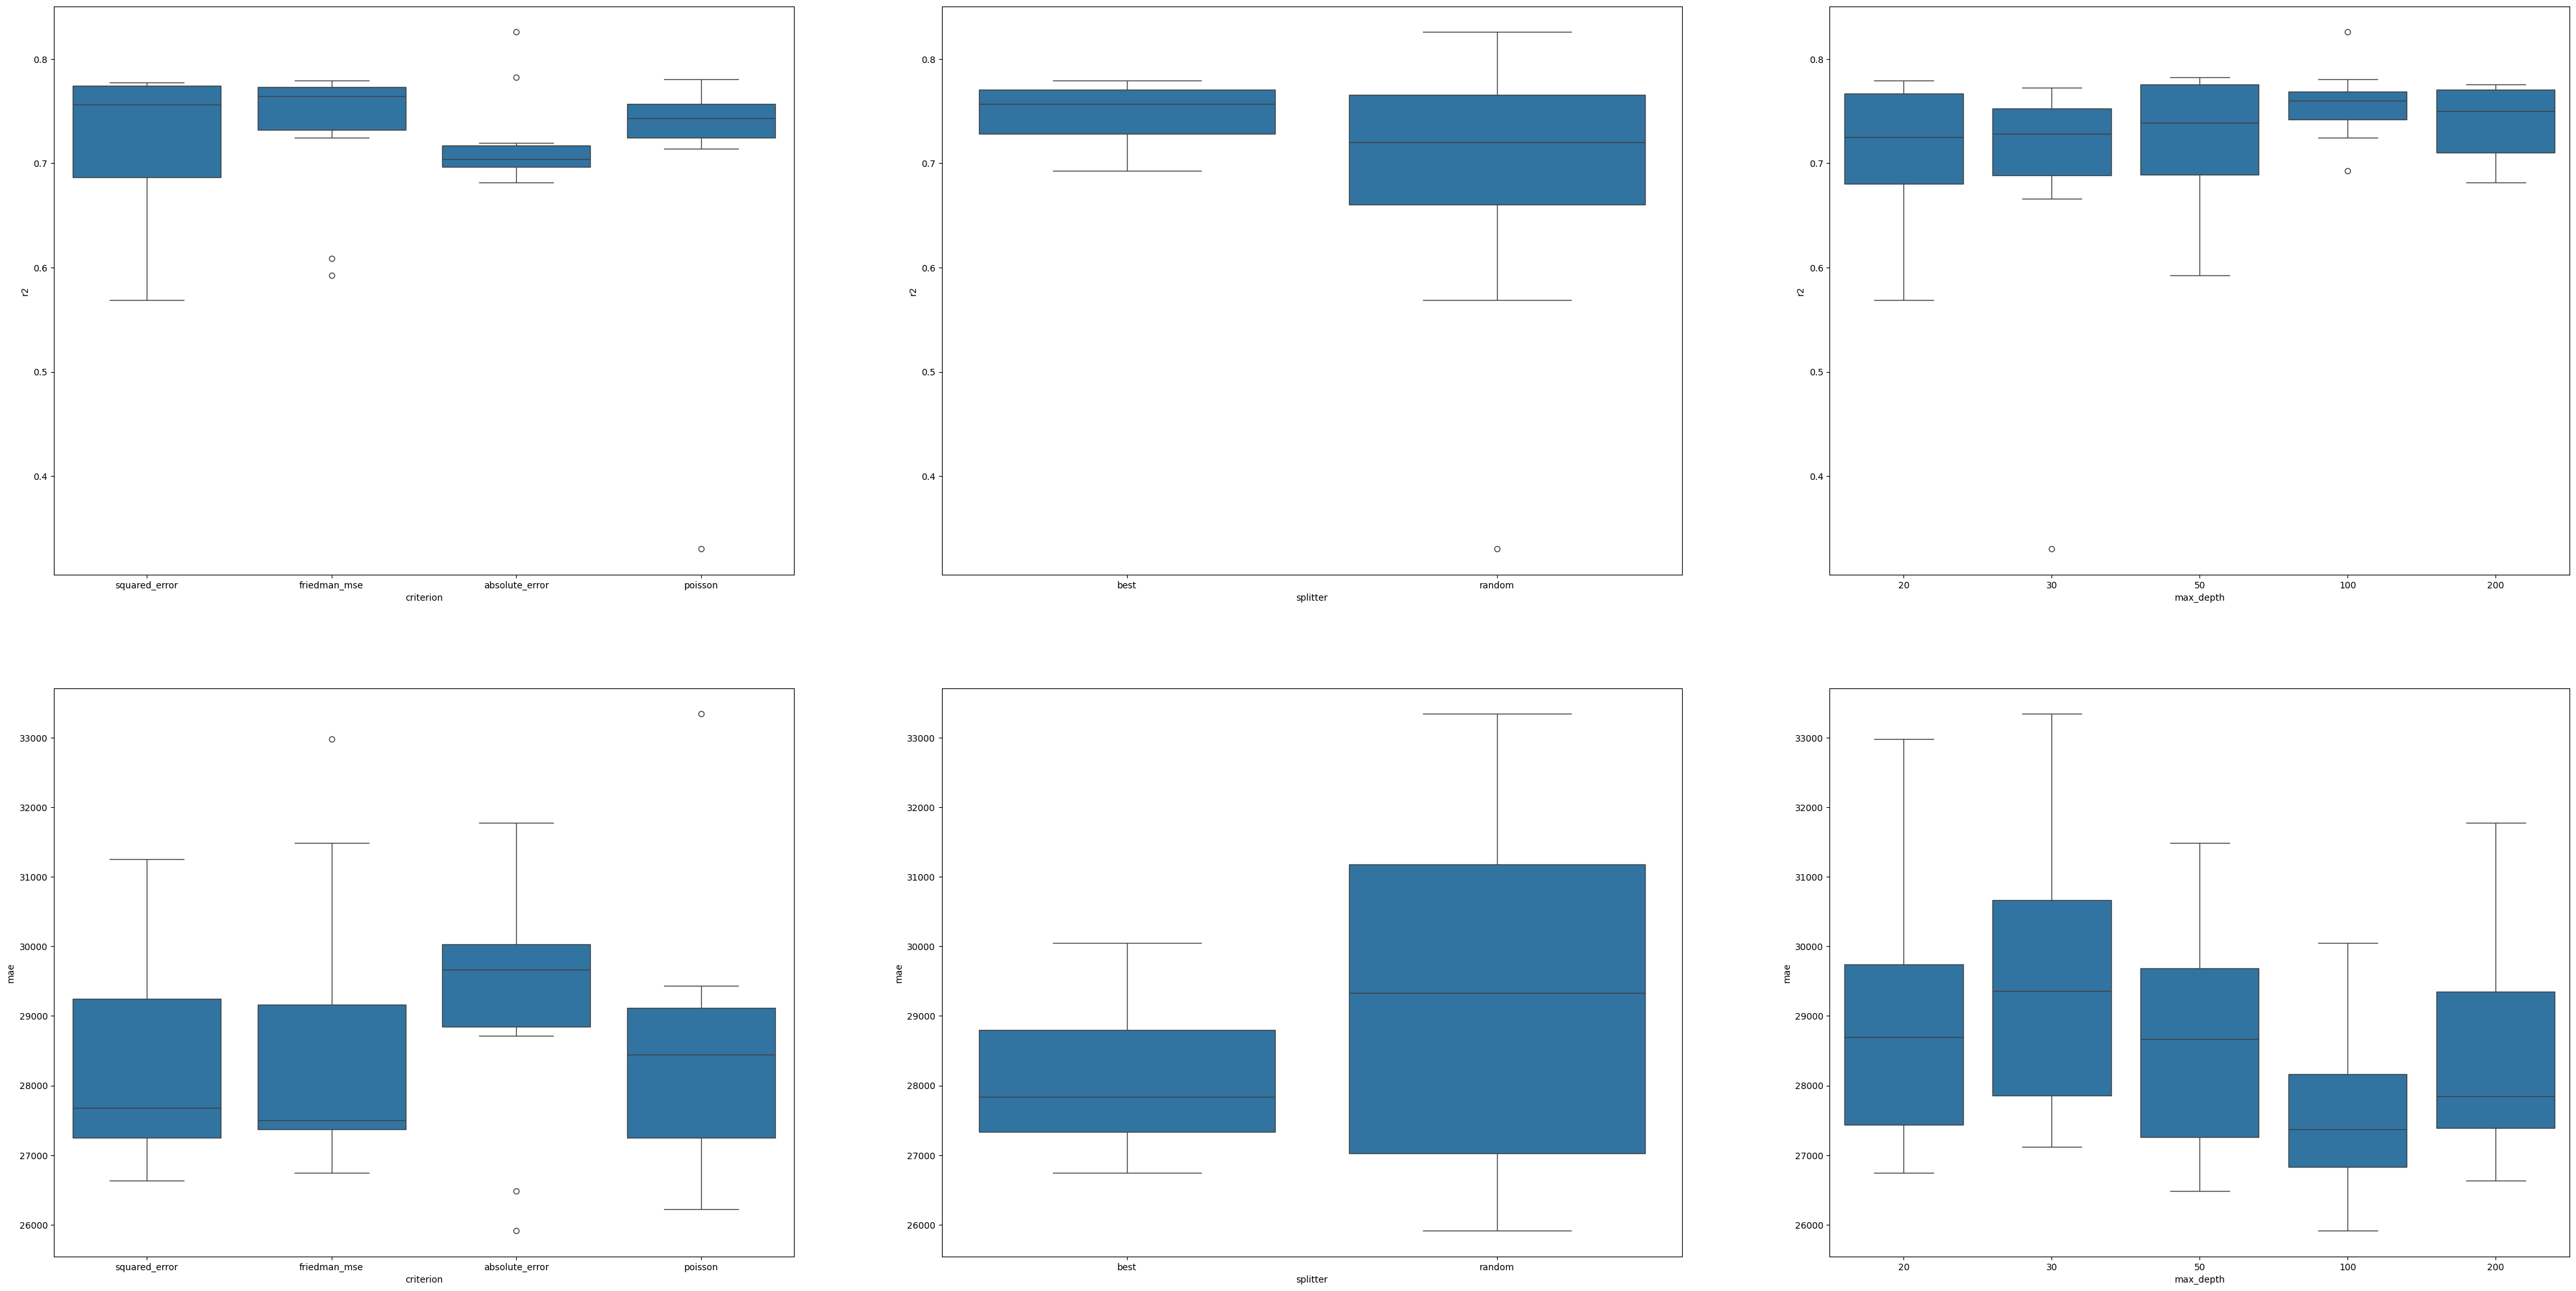

In [58]:
x_axis=['criterion', 'splitter', 'max_depth']
y_axis=['r2', 'mae']
fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(50,25))
i,j=0,0
for y in y_axis:
    if i==2:break
    for x in x_axis:
        if j==3:j=0
        sns.boxplot(data=statistic.loc[statistic["dataset"]=='training5.cs'],x=x,y=y,ax=ax[i][j])
        j+=1
    i+=1